In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Fetch the Url
url = 'https://en.wikipedia.org/wiki/List_of_largest_banks'
response = requests.get(url)

# Parse the page with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table data
table = soup.find_all('table', {'class': 'wikitable'})

In [26]:
# Convert the table data into a pandas DataFrame
data = pd.read_html(str(table))
df = data[1]

# Rename the columns for easier access
df.columns = ['Rank', 'Bank name', 'Total assets']

# Remove unwanted characters from 'Total assets' and convert to numeric
df['Total assets'] = df['Total assets'].replace('[\$,]', '', regex=True).astype(float)

# Display the DataFrame
print(df.head(10))

# Sort the DataFrame
df = df.sort_values('Total assets')

   Rank                                        Bank name  Total assets
0     1  Industrial and Commercial Bank of China Limited       5742.86
1     2                          China Construction Bank       5016.81
2     3                       Agricultural Bank of China       4919.03
3     4                                    Bank of China       4192.12
4     5                                   JPMorgan Chase       3898.33
5     6                                  Bank of America       3051.38
6     7                   Mitsubishi UFJ Financial Group       2967.91
7     8                                             HSBC       2864.59
8     9                                      BNP Paribas       2849.61
9    10                                  Crédit Agricole       2542.61


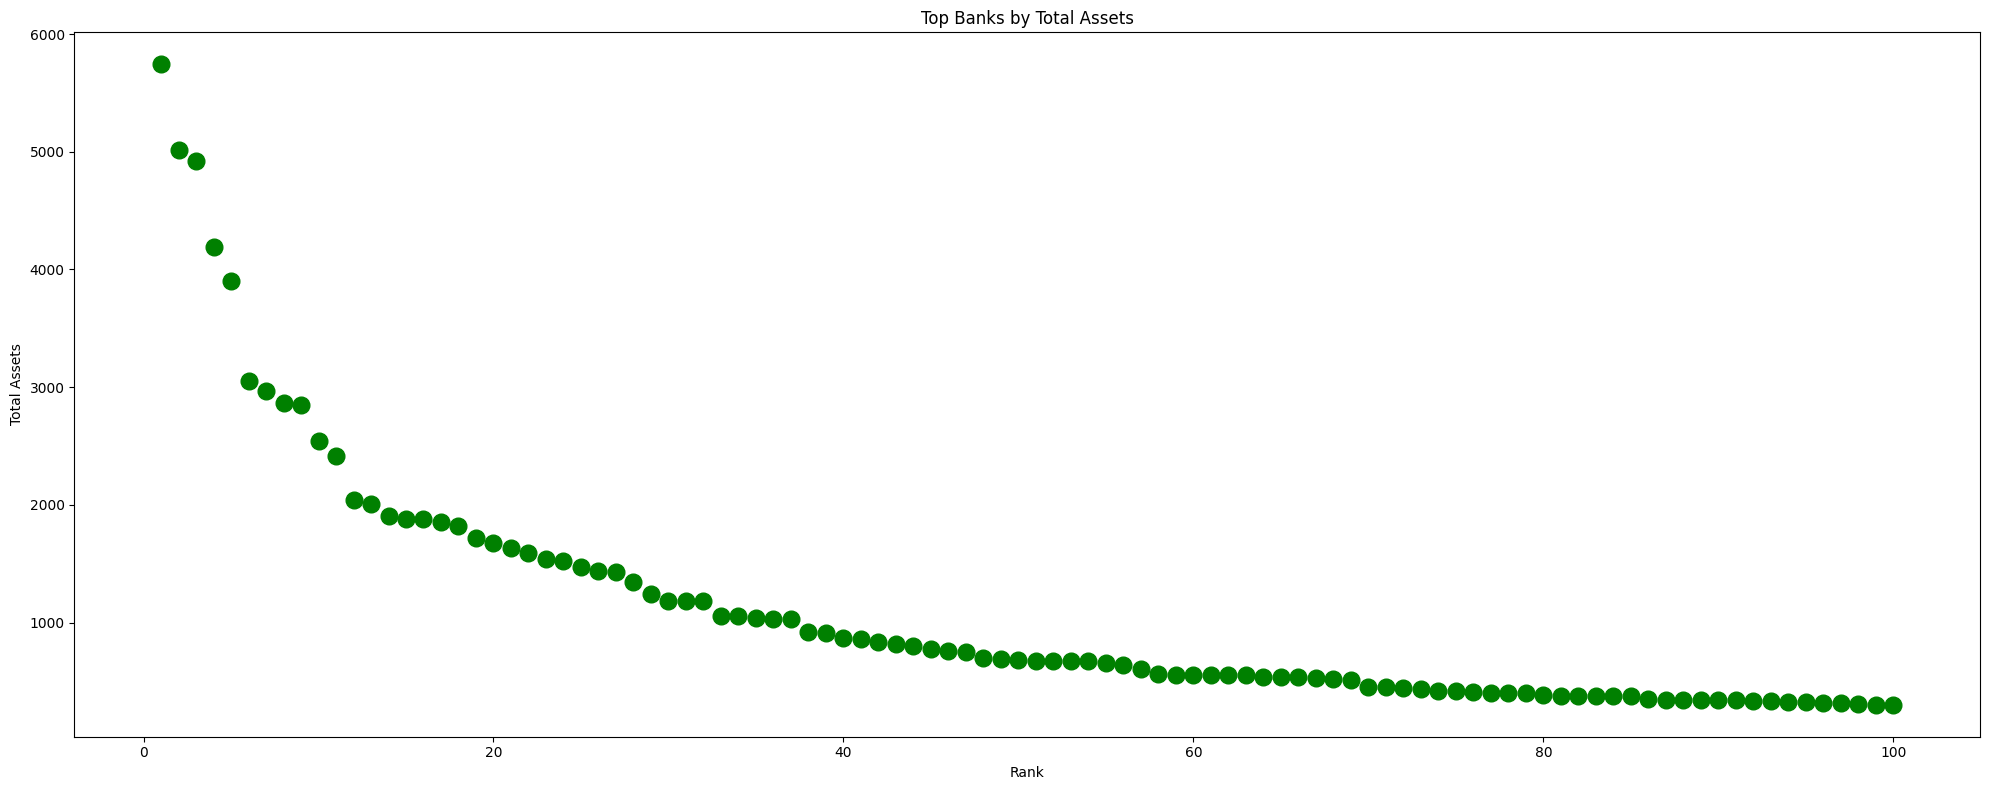

In [60]:
# Set the column names explicitly
df.columns = ['Rank', 'Bank name', 'Total assets']

# Remove rows with missing data
df = df.dropna()

# Plotting the dot graph with Rank as x-labels
plt.figure(figsize=(20, 8))
plt.plot(df['Rank'], df['Total assets'], marker='o', linestyle='', markersize=12, color='Green')
plt.xlabel('Rank')
plt.ylabel('Total Assets')
plt.title('Top Banks by Total Assets')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()